In [2]:
# --- Import Libraries ---
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random


In [3]:
# --- Load MNIST dataset ---
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# --- Preprocessing ---
# Expand dimensions (28x28 → 28x28x1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# Convert grayscale to RGB (1 → 3 channels)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

In [6]:

# Resize to (96, 96) for MobileNetV2
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

In [7]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# --- Load MobileNetV2 base model ---
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3)
)

C:\Users\adity\AppData\Local\Temp\ipykernel_12500\3460482650.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [9]:

# Freeze base model weights (for transfer learning)
base_model.trainable = False

In [10]:
# --- Build the model ---
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes for digits 0-9
])

In [11]:
# --- Compile the model ---
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # no one-hot encoding needed
    metrics=['accuracy']
)

In [ ]:

# --- Train the model ---
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=3,          # increase epochs for better accuracy
    batch_size=64,
    verbose=1
)

Epoch 1/3
921/938 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5447 - loss: 1.4139

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 108ms/step


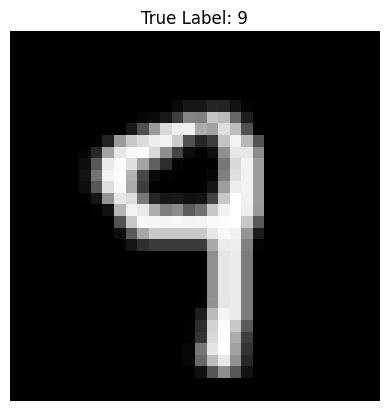

Prediction Vector:
 [6.8647666e-03 9.0852964e-06 5.5496674e-03 1.1607490e-03 7.2761159e-03
 1.2900281e-03 2.4062692e-06 7.5136991e-03 1.9214158e-03 9.6841192e-01]
Predicted Class Index: 9


In [14]:
# --- Prediction block ---
p = model.predict(x_test)
r = random.randint(0, 9999)

plt.imshow(x_test[r])
plt.axis('off')
plt.title(f"True Label: {y_test[r]}")
plt.show()

print("Prediction Vector:\n", p[r])
print("Predicted Class Index:", np.argmax(p[r]))